In [23]:
#importing dependencies for the analysis
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DressAttribute/Attribute DataSet.csv")

In [ ]:
data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [ ]:
# Forward fill and backward filling to handle Nans
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,microfiber,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,chiffon,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,chiffon,ruffles,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [17]:
# Encode categorical variables
categorical_cols = ['Style', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration', 'Pattern Type', 'Price', 'Size']
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])

In [18]:
# Separate the features (X) and target variable (y)
X = data.drop('Recommendation', axis=1)
y = data['Recommendation']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Classification: Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67        58
           1       0.52      0.40      0.45        42

    accuracy                           0.59       100
   macro avg       0.57      0.56      0.56       100
weighted avg       0.58      0.59      0.58       100



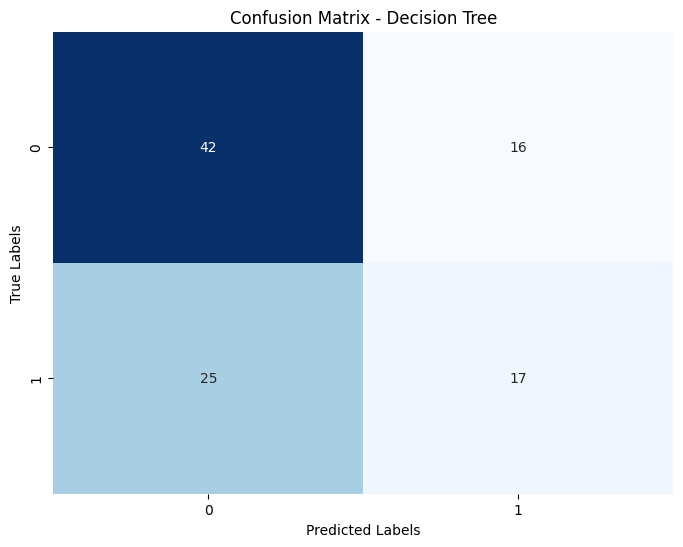

In [24]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Classification: Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.84      0.72        58
           1       0.57      0.29      0.38        42

    accuracy                           0.61       100
   macro avg       0.60      0.57      0.55       100
weighted avg       0.60      0.61      0.57       100



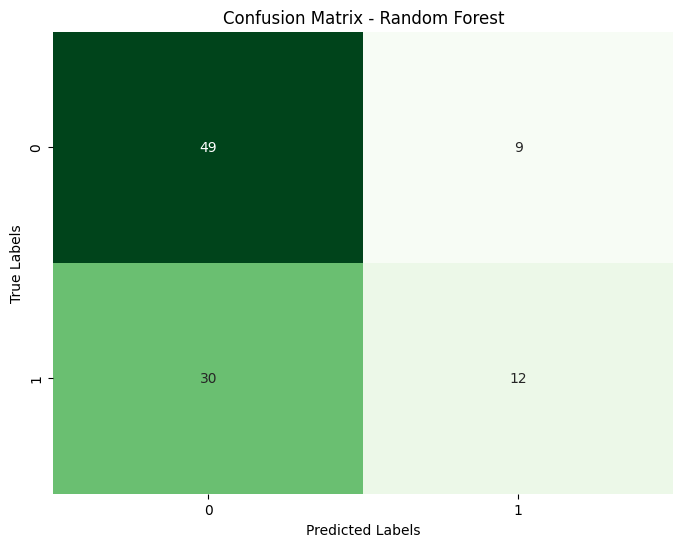

In [26]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [28]:
from sklearn.cluster import KMeans

# Clustering: K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


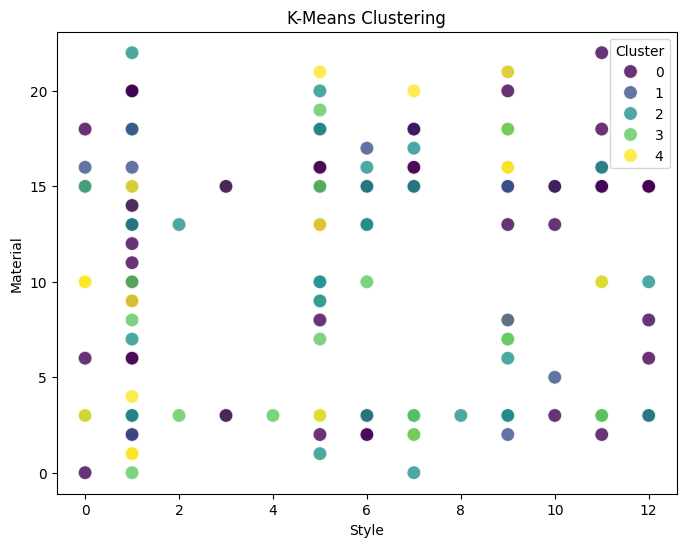

In [34]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Style'], y=X['Material'], hue=data['Cluster'], palette='viridis', s=100, alpha=0.8)
plt.title('K-Means Clustering')
plt.xlabel('Style')
plt.ylabel('Material')
plt.legend(title='Cluster')
plt.show()